In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

### Context

As an analyst at ABC Estate Wines, we are presented with historical data encompassing the sales of different types of wines throughout the 20th century. These datasets originate from the same company but represent sales figures for distinct wine varieties. Our objective is to delve into the data, analyze trends, patterns, and factors influencing wine sales over the course of the century. By leveraging data analytics and forecasting techniques, we aim to gain actionable insights that can inform strategic decision-making and optimize sales strategies for the future.

### Objective

The primary objective of this project is to analyze and forecast wine sales trends for the 20th century based on historical data provided by ABC Estate Wines. We aim to equip ABC Estate Wines with the necessary insights and foresight to enhance sales performance, capitalize on emerging market opportunities, and maintain a competitive edge in the wine industry.

### Define the problem and perform Exploratory Data Analysis
- Read the data as an appropriate time series data - Plot the data - Perform EDA - Perform Decomposition

In [5]:
df_1 = pd.read_csv("Sparkling.csv")

In [6]:
df_1.head()

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


In [7]:
df_1.tail()

,YearMonth,Sparkling
182,1995-03,1897
183,1995-04,1862
184,1995-05,1670
185,1995-06,1688
186,1995-07,2031


In [8]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [9]:
# Adding the time stamp to the data frame
df_1['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])
df_1.head()

,YearMonth,Sparkling,Time_Stamp
0,1980-01,1686,1980-01-31
1,1980-02,1591,1980-02-29
2,1980-03,2304,1980-03-31
3,1980-04,1712,1980-04-30
4,1980-05,1471,1980-05-31


In [10]:
# Set Time_Stamp as an index
df_1.set_index('Time_Stamp',inplace=True)
df_1.drop(['YearMonth'], axis=1, inplace=True)
df_1.head()

,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


In [11]:
df_1.head()

,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


In [12]:
df_1.tail()

,Sparkling
Time_Stamp,
1995-03-31,1897
1995-04-30,1862
1995-05-31,1670
1995-06-30,1688
1995-07-31,2031


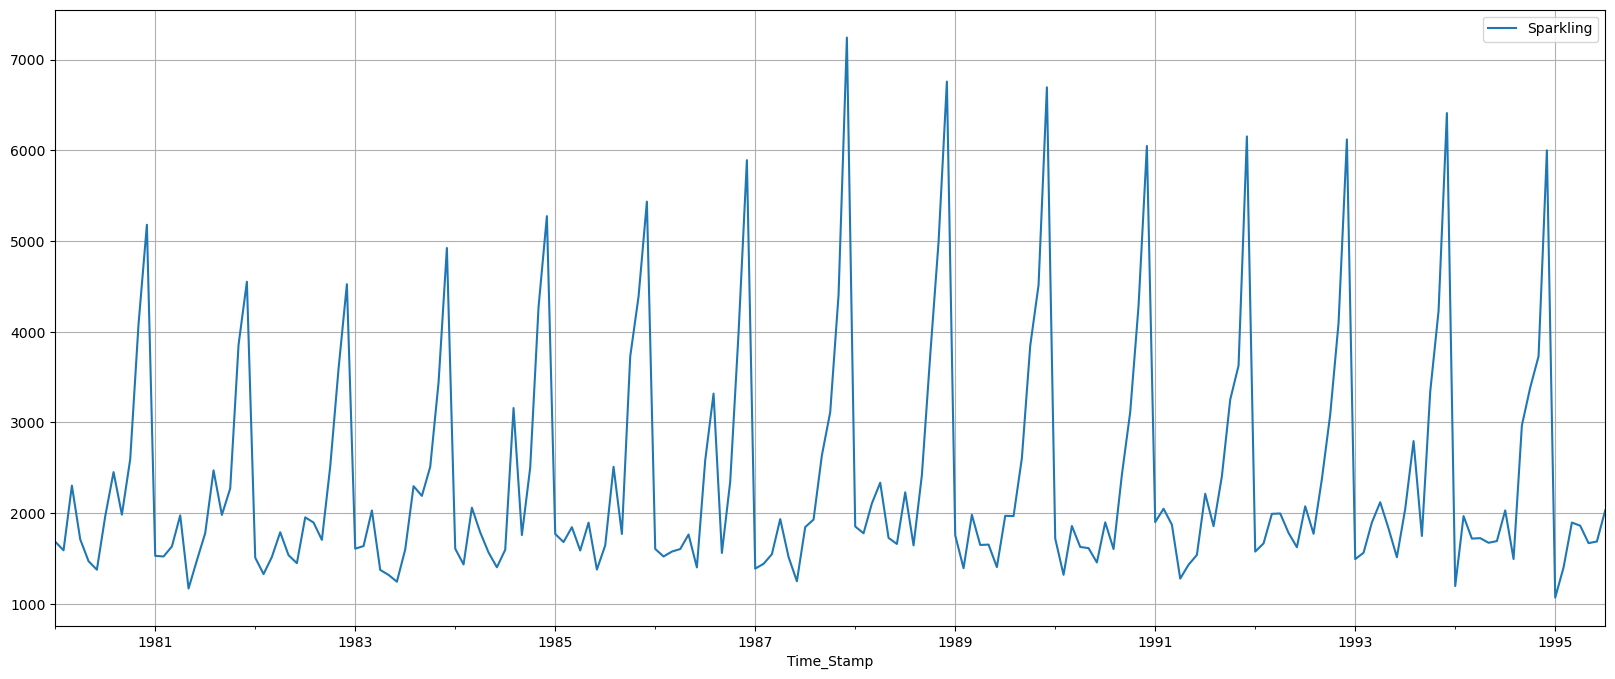

In [13]:
df_1.plot(figsize=(20,8))
plt.grid();

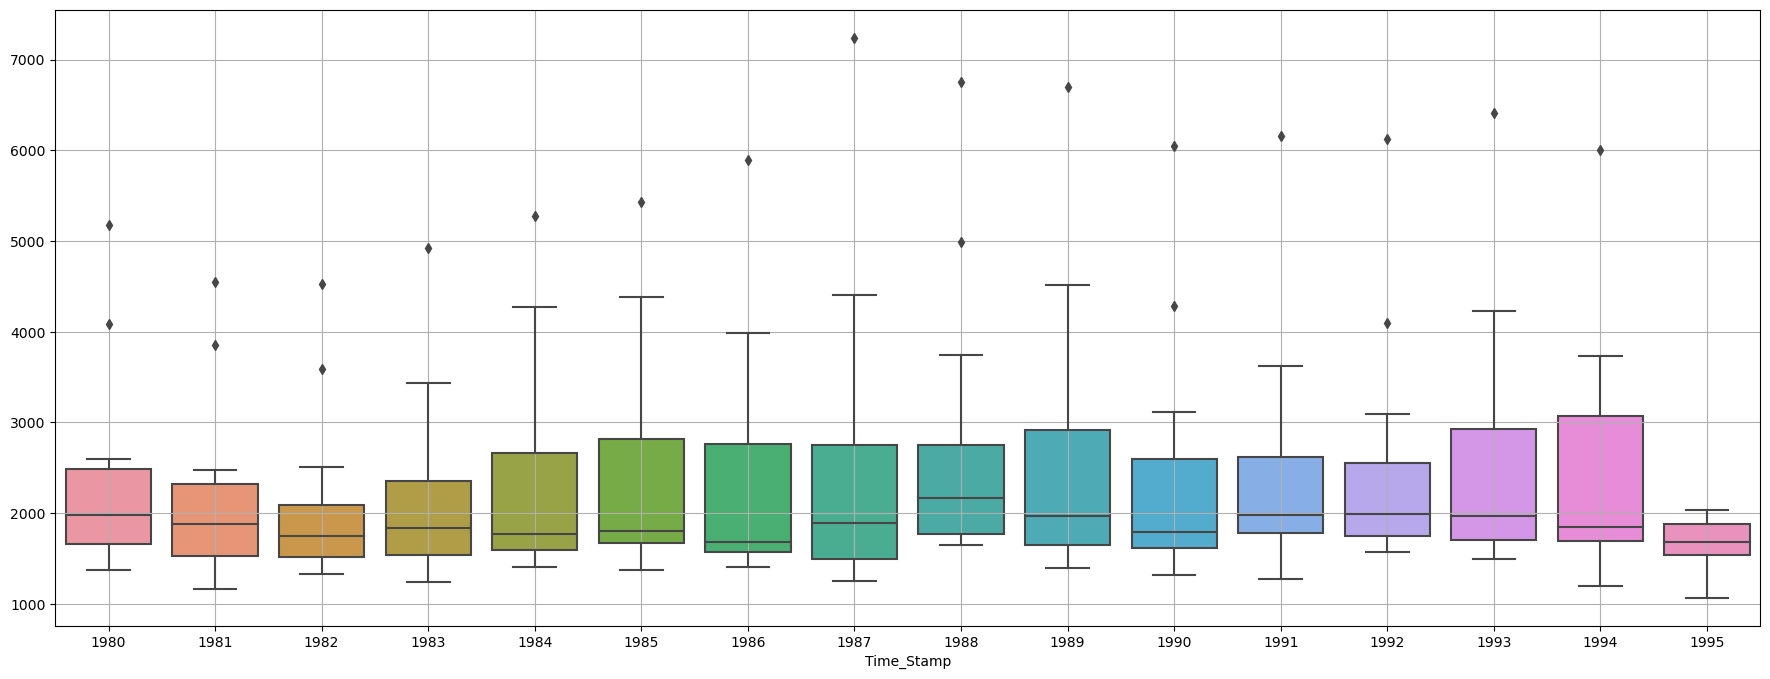

In [14]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df_1.index.year,y = df_1.values[:,0],ax=ax)
plt.grid();

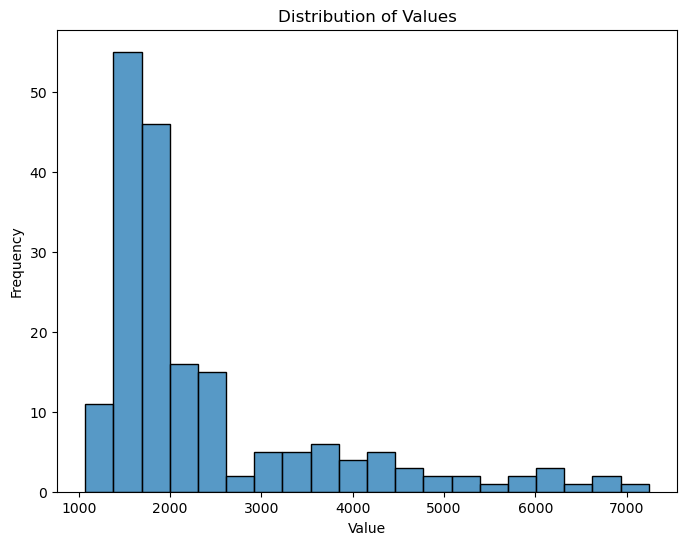

In [15]:
# Visualize data distribution
plt.figure(figsize=(8, 6))
sns.histplot(df_1['Sparkling'], bins=20) 
plt.title('Distribution of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [16]:
print(df_1.describe())

print(df_1.info())

         Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB
None


In [17]:
# Check for missing values
print(df_1.isnull().sum())

Sparkling    0
dtype: int64


Plot a monthplot of the give Time Series.

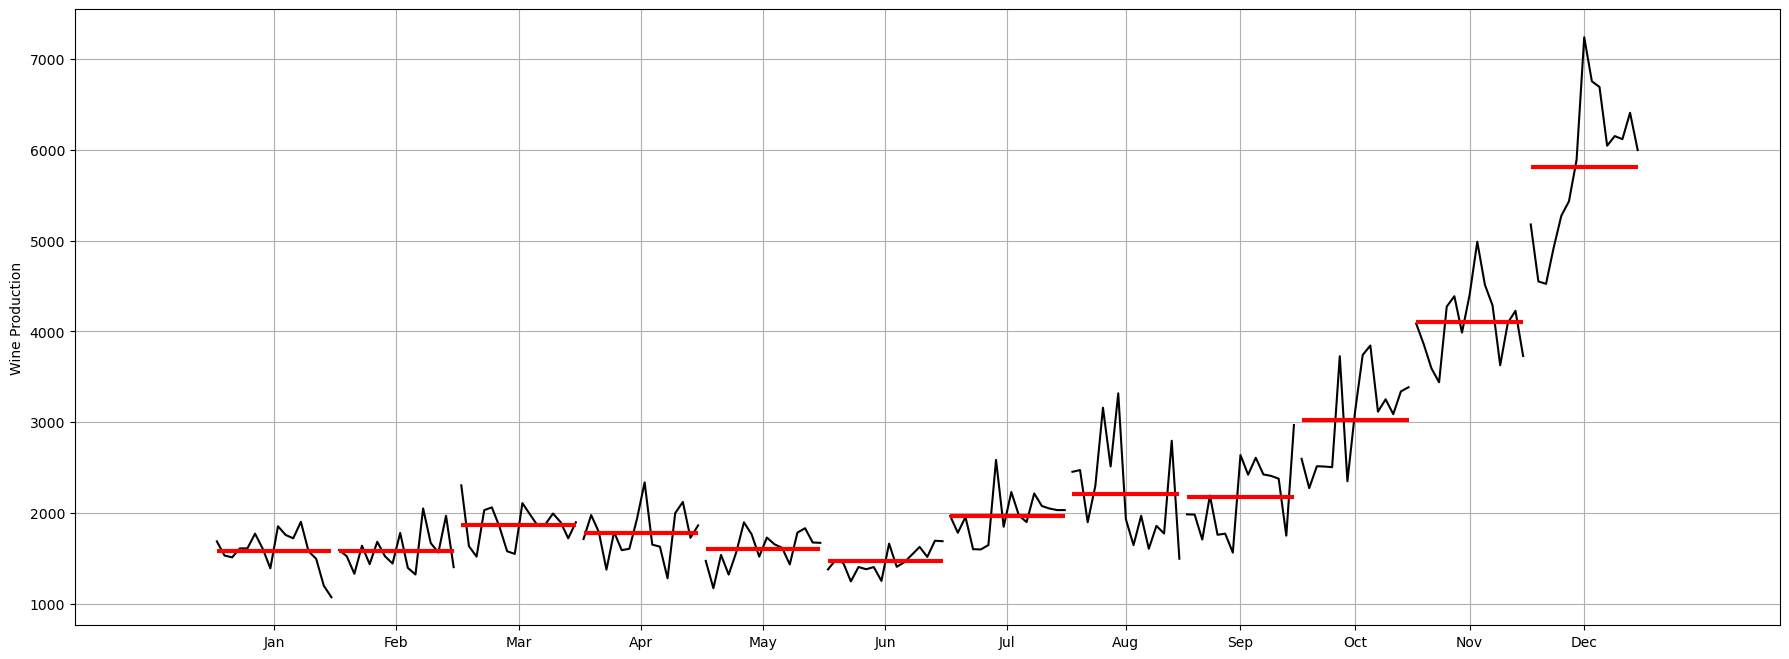

In [18]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(df_1,ylabel='Wine Production',ax=ax)
plt.grid();

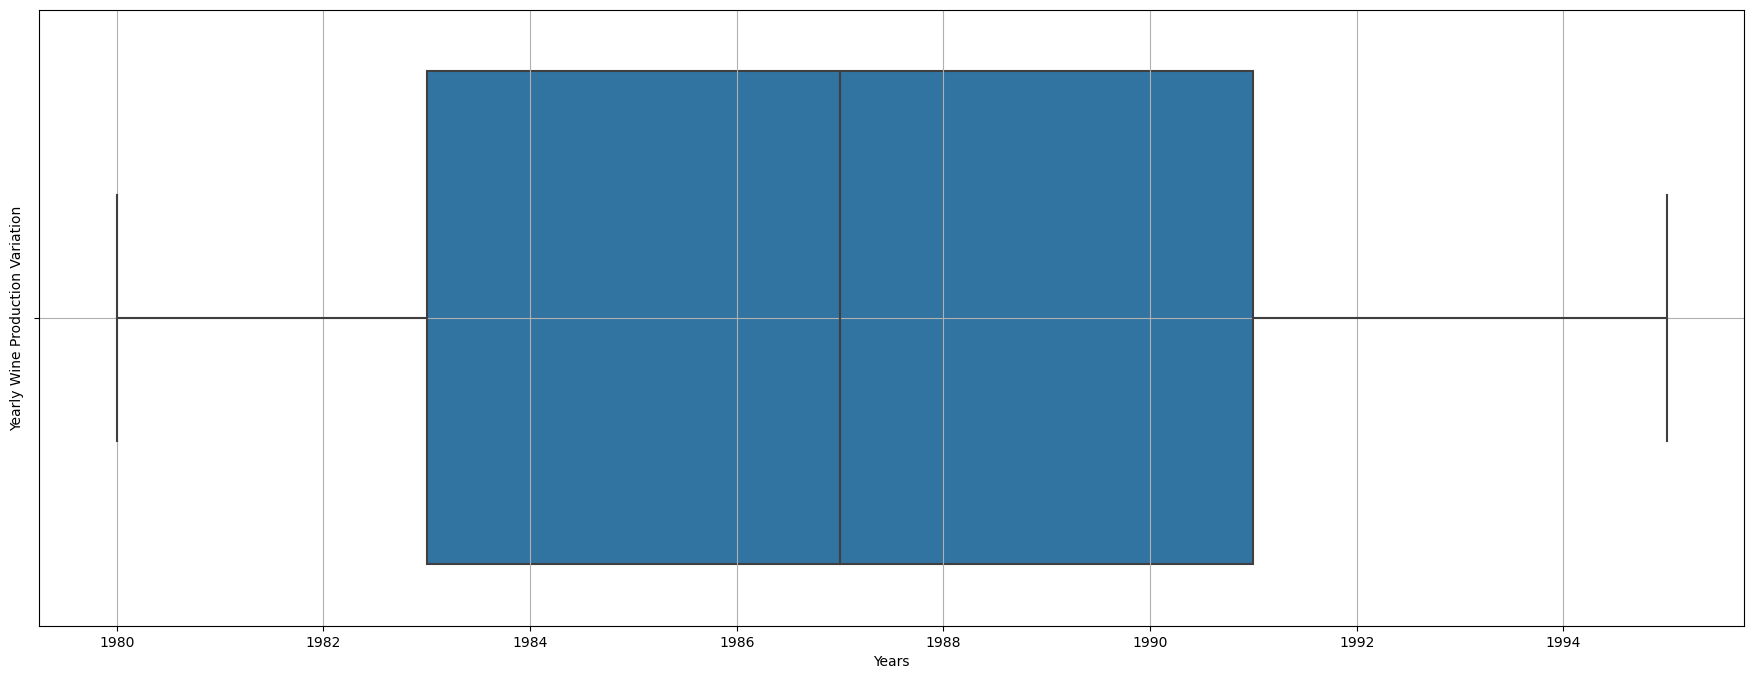

In [19]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x=df_1.index.year, data=df_1, ax=ax,whis=1.5)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Wine Production Variation');

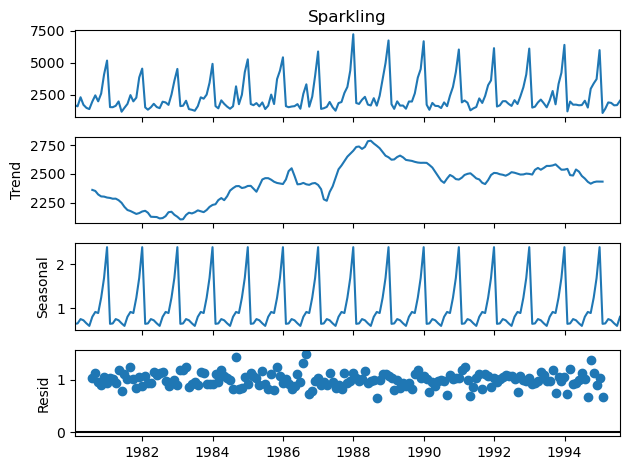

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_1['Sparkling'], model='multiplicative')
result.plot()
plt.show()

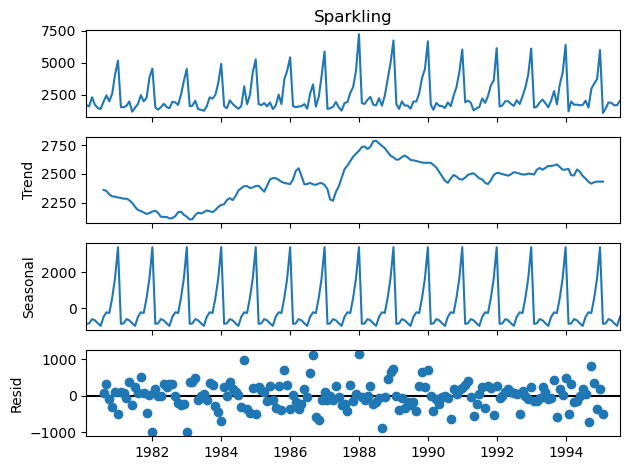

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_1['Sparkling'], model='additive')
result.plot()
plt.show()

- Train-test split

In [22]:
train    =   df_1[0:int(len(df_1)*0.7)] 
test     =   df_1[int(len(df_1)*0.7):]

In [23]:
print(train.shape)
print(test.shape)

(130, 1)
(57, 1)


In [24]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
             Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471 

Last few rows of Training Data 
             Sparkling
Time_Stamp           
1990-06-30       1457
1990-07-31       1899
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116 

First few rows of Test Data 
             Sparkling
Time_Stamp           
1990-11-30       4286
1990-12-31       6047
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874 

Last few rows of Test Data 
             Sparkling
Time_Stamp           
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031 



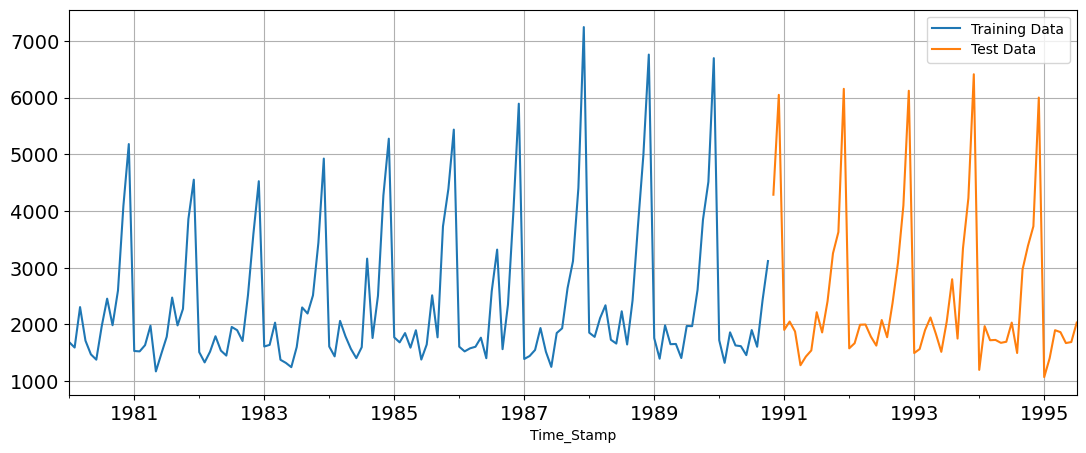

In [25]:
train['Sparkling'].plot(figsize=(13,5), fontsize=14)
test['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

Model Building - Original Data
- Build forecasting models - Linear regression - Simple Average - Moving Average - Exponential Models (Single, Double, Triple) - Check the performance of the models built

Model 1: Linear Regression

In [26]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+131 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130]
Test Time instance 
 [131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [27]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [28]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5 

Last few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1990-06-30       1457   126
1990-07-31       1899   127
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130 

First few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1990-11-30       4286   131
1990-12-31       6047   132
1991-01-31       1902   133
1991-02-28       2049   134
1991-03-31       1874   135 

Last few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1995-03-31       1897   183
1995-04-30       1862   184
1995-05-31       1670   185
1995-06-30       1688   186
1995-07-31       2031   187 



In [29]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

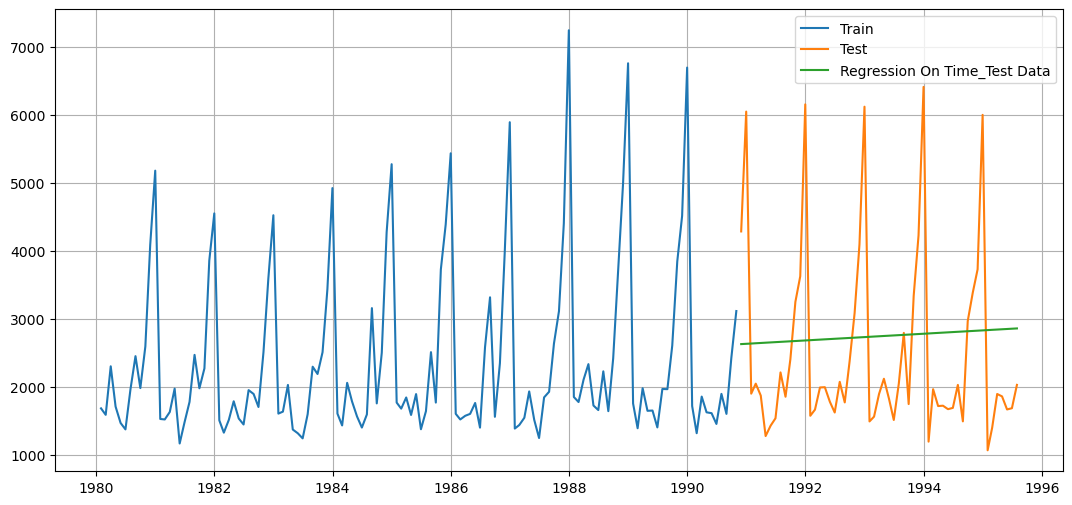

In [30]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

Defining the accuracy metrics.

In [31]:
from sklearn import metrics

Model Evaluation

In [32]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.2f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1392.44


In [33]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,1392.438305


Method 2: Moving Average(MA)

In [34]:
MovingAverage = df_1.copy()
MovingAverage.head()

,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


Trailing moving averages

In [35]:

MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
1980-01-31,1686,NaN,NaN,NaN,NaN
1980-02-29,1591,1638.5,NaN,NaN,NaN
1980-03-31,2304,1947.5,NaN,NaN,NaN
1980-04-30,1712,2008.0,1823.25,NaN,NaN
1980-05-31,1471,1591.5,1769.50,NaN,NaN


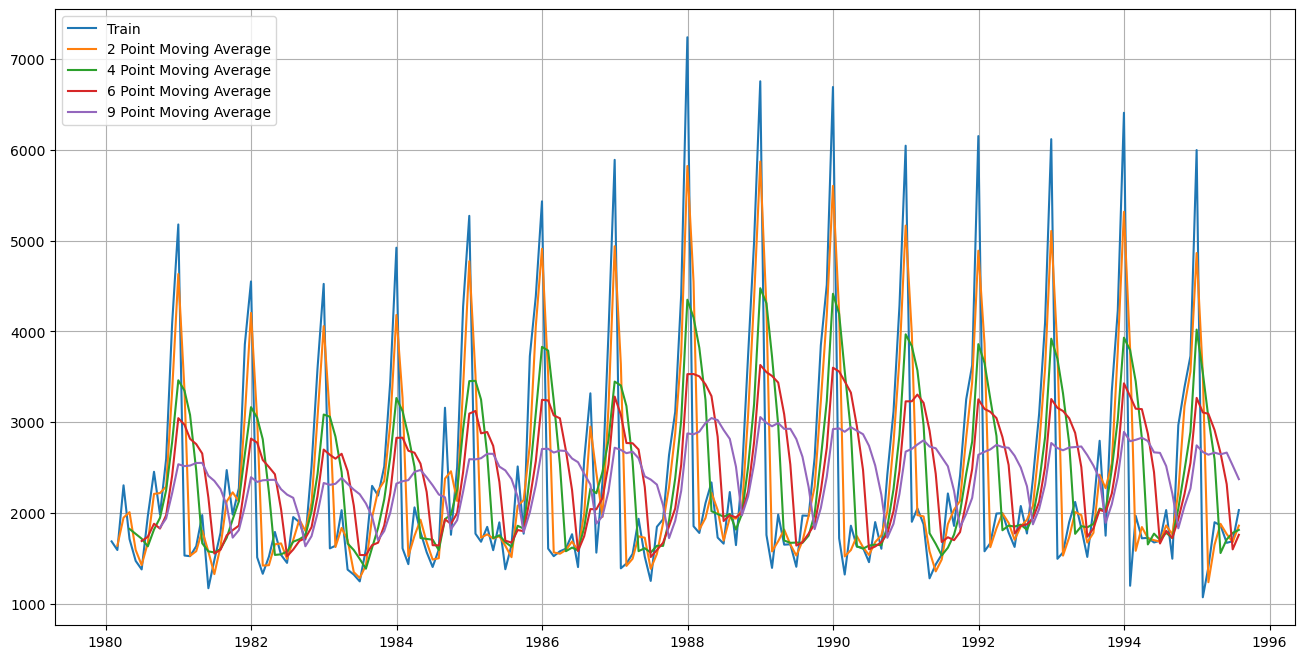

In [36]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [37]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.7)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.7):]

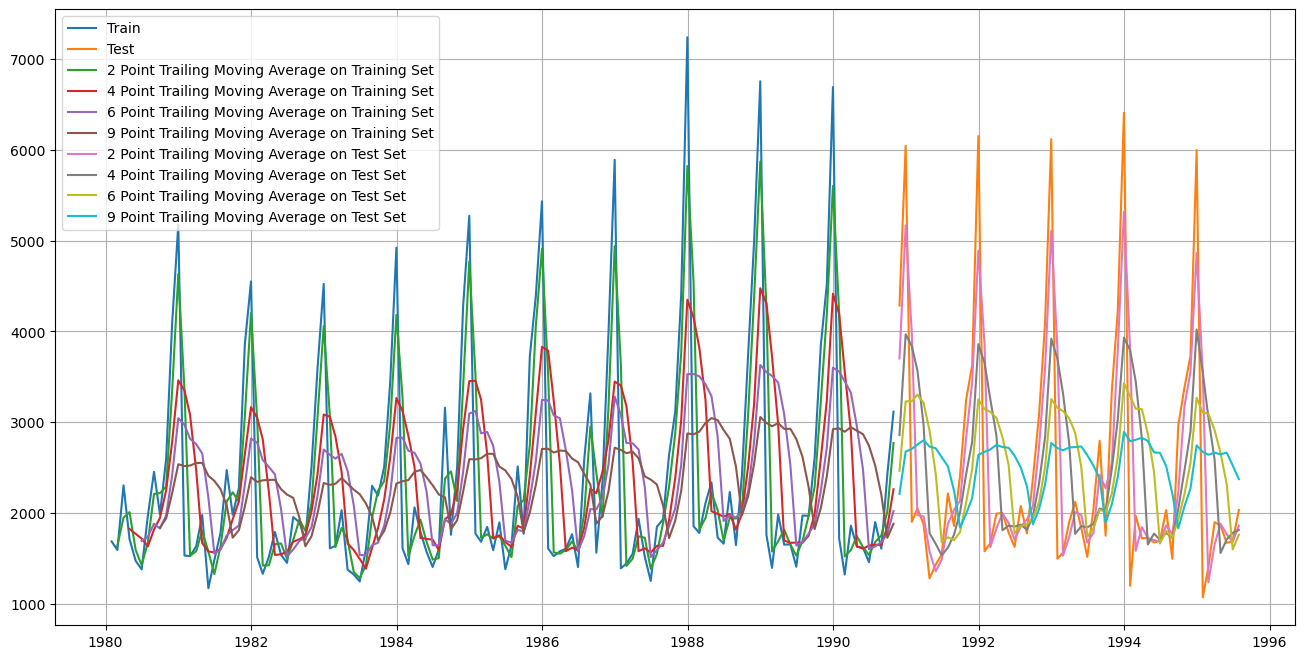

In [38]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

RMSE Calculation as below

In [39]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 811.179
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1184.213
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1337.201
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1422.653 


In [40]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,1392.438305
2pointTrailingMovingAverage,811.178937
4pointTrailingMovingAverage,1184.213295
6pointTrailingMovingAverage,1337.200524
9pointTrailingMovingAverage,1422.653281


### Method 3: Simple Exponential Smoothing

In [41]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [42]:
SES_train = train.copy()
SES_test = test.copy()

In [43]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

C:\Users\u411715\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [44]:
model_SES_autofit = model_SES.fit(optimized=True)

In [45]:
model_SES_autofit.params

{'smoothing_level': 0.03753429967857803,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [46]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,Sparkling,predict
Time_Stamp,,
1990-11-30,4286,2465.235699
1990-12-31,6047,2465.235699
1991-01-31,1902,2465.235699
1991-02-28,2049,2465.235699
1991-03-31,1874,2465.235699


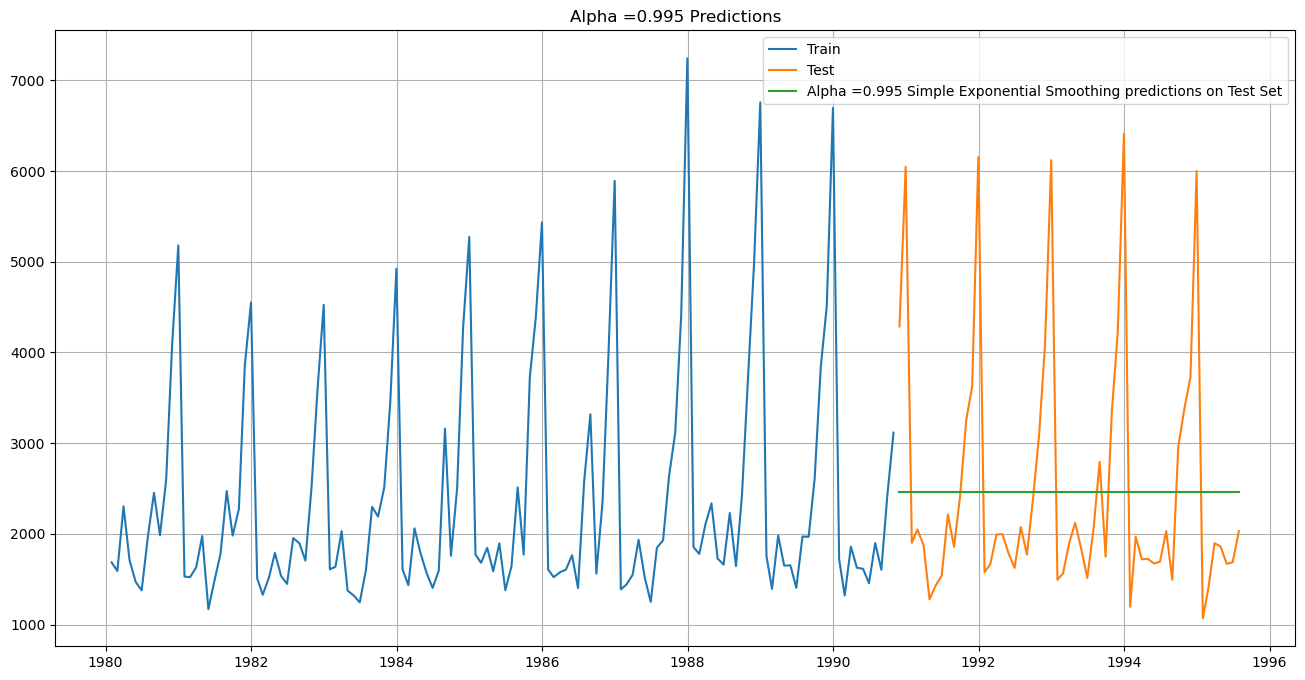

In [47]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.995 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');

Model Evaluation for  𝛼
  = 0.995 : Simple Exponential Smoothing

In [48]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
print("For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1362.429


In [49]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.995,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE
RegressionOnTime,1392.438305
2pointTrailingMovingAverage,811.178937
4pointTrailingMovingAverage,1184.213295
6pointTrailingMovingAverage,1337.200524
9pointTrailingMovingAverage,1422.653281
"Alpha=0.995,SimpleExponentialSmoothing",1362.428949


### Method 4: Double Exponential Smoothing (Holt's Model)

In [50]:
DES_train = train.copy()
DES_test = test.copy()

In [51]:
model_DES = Holt(DES_train['Sparkling'])

C:\Users\u411715\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [52]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [53]:
results_list = [] # create an empty list to store the results
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(len(test['Sparkling']))
        
        rmse_DES_train = np.round(metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j],squared=False),2) # use the mean_squared_error function from the metrics module

        rmse_DES_test = np.round(metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False),2)

        results_list.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_DES_train, 'Test RMSE':rmse_DES_test}) # append the results to the list

resultsDf_7 = pd.DataFrame(results_list)

C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\1650539156.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\1650539156.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(len(test['Sparkling']))


In [54]:
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.1,0.1,1345.66,1743.49
1,0.1,0.2,1372.39,2515.49
2,0.1,0.3,1403.51,2743.44
3,0.1,0.4,1440.02,2921.63
4,0.1,0.5,1481.15,3547.05
...,...,...,...,...
95,1.0,0.6,1764.66,20558.03
96,1.0,0.7,1837.43,22155.07
97,1.0,0.8,1915.15,23241.84
98,1.0,0.9,1999.36,23787.75


In [55]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
30,0.4,0.1,1402.99,1369.14
21,0.3,0.2,1479.94,1516.79
15,0.2,0.6,1798.09,1540.32
40,0.5,0.1,1396.30,1585.87
22,0.3,0.3,1567.52,1597.85


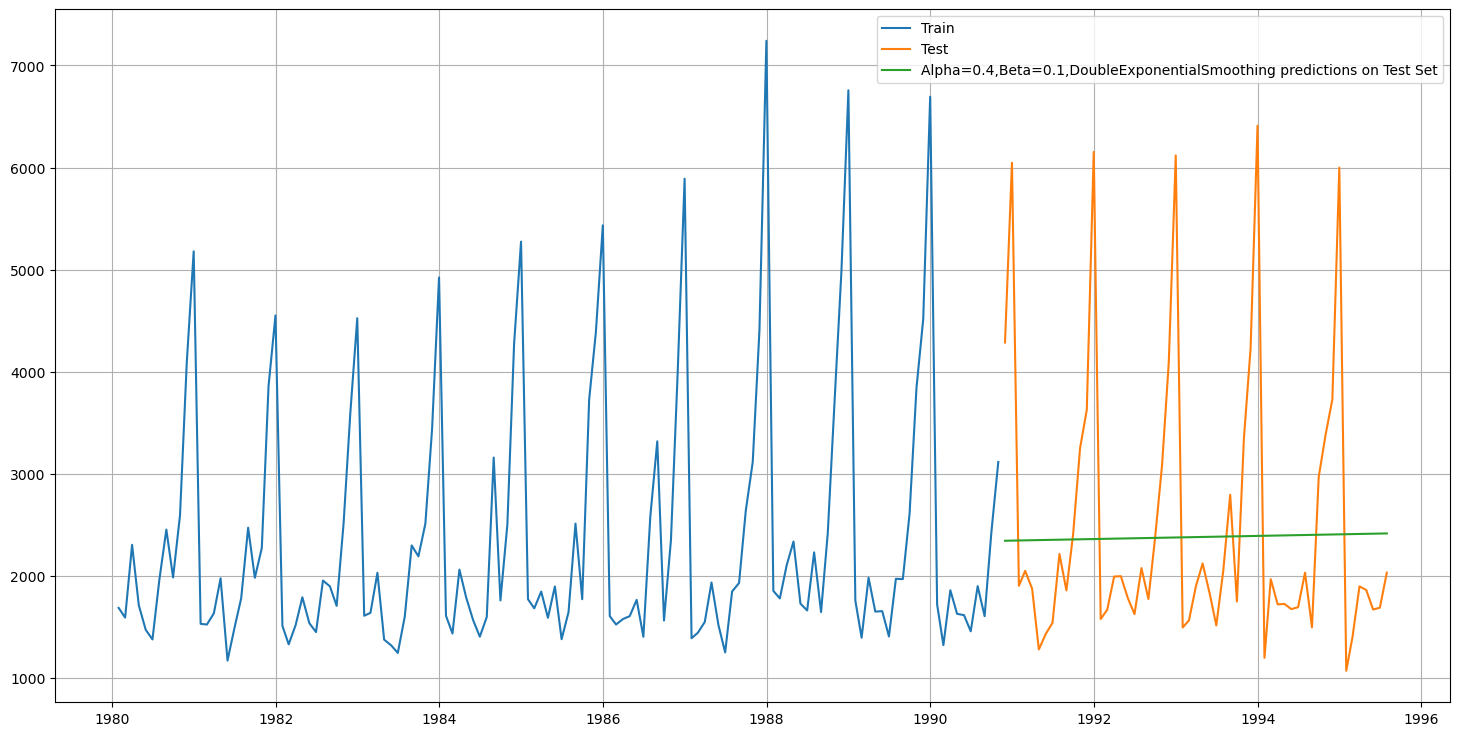

In [56]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_test['predict', 0.4, 0.1], label='Alpha=0.4,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [57]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.4,Beta=0.1,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

,Test RMSE
RegressionOnTime,1392.438305
2pointTrailingMovingAverage,811.178937
4pointTrailingMovingAverage,1184.213295
6pointTrailingMovingAverage,1337.200524
9pointTrailingMovingAverage,1422.653281
"Alpha=0.995,SimpleExponentialSmoothing",1362.428949
"Alpha=0.4,Beta=0.1,DoubleExponentialSmoothing",1369.140000


### Method 5: Triple Exponential Smoothing (Holt - Winter's Model)

In [58]:
TES_train = train.copy()
TES_test = test.copy()

In [59]:
model_TES= ExponentialSmoothing(TES_train['Sparkling'],trend='add',seasonal='multiplicative')


C:\Users\u411715\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [60]:
model_TES_autofit = model_TES.fit()

In [61]:
model_TES_autofit.params

{'smoothing_level': 0.07571436313248113,
 'smoothing_trend': 0.06489797544827652,
 'smoothing_seasonal': 0.37656119528818677,
 'damping_trend': nan,
 'initial_level': 2356.5416452586046,
 'initial_trend': -9.1832706858158,
 'initial_seasons': array([0.71216499, 0.67784092, 0.89637185, 0.79723438, 0.64092765,
        0.63998052, 0.86735702, 1.11329954, 0.89759201, 1.18596432,
        1.83356101, 2.32727388]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [62]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,Sparkling,auto_predict
Time_Stamp,,
1990-11-30,4286,4327.597955
1990-12-31,6047,6208.850701
1991-01-31,1902,1621.603392
1991-02-28,2049,1379.864103
1991-03-31,1874,1791.912187


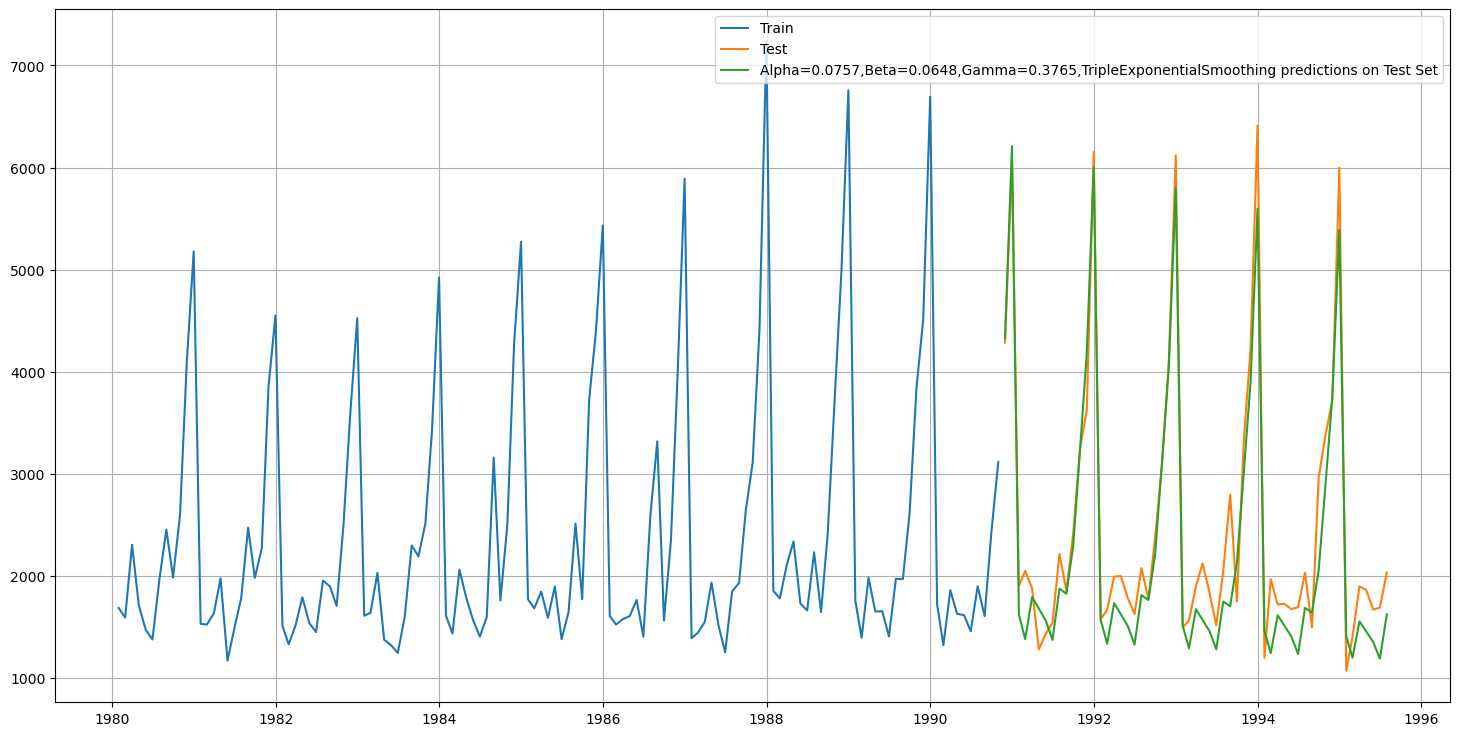

In [63]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.0757,Beta=0.0648,Gamma=0.3765,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [64]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.0757,Beta=0.0648,Gamma=0.3765, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.0757,Beta=0.0648,Gamma=0.3765, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 381.656


In [65]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.0757,Beta=0.0648,Gamma=0.3765,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,Test RMSE
RegressionOnTime,1392.438305
2pointTrailingMovingAverage,811.178937
4pointTrailingMovingAverage,1184.213295
6pointTrailingMovingAverage,1337.200524
9pointTrailingMovingAverage,1422.653281
"Alpha=0.995,SimpleExponentialSmoothing",1362.428949
"Alpha=0.4,Beta=0.1,DoubleExponentialSmoothing",1369.140000
"Alpha=0.0757,Beta=0.0648,Gamma=0.3765,TripleExponentialSmoothing",381.656471


In [66]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [67]:
results_list1 = []
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Sparkling']))
        
            rmse_model8_train = np.round(metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict',i,j,k],squared=False),2)
            
            rmse_model8_test = np.round(metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False),2)
            
            results_list1.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test})
                                        
            
resultsDf_8_2 = pd.DataFrame(results_list1)

C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Sparkling']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Sparkling']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Sparkling']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Sparkling']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Sparkling']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Sparkling']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Sparkling']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Sparkling']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Sparkling']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Sparkling']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Sparkling']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Sparkling']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Sparkling']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Sparkling']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Sparkling']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Sparkling']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Sparkling']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Sparkling']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Sparkling']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Sparkling']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Sparkling']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Sparkling']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Sparkling']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Sparkling']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Sparkling']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Sparkling']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Sparkling']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Sparkling']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Sparkling']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Sparkling']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Sparkling']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Sparkling']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Sparkling']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Sparkling']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Sparkling']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Sparkling']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Sparkling']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Sparkling']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Sparkling']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Sparkling']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Sparkling']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Sparkling']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Sparkling']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Sparkling']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Sparkling']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Sparkling']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Sparkling']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Sparkling']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Sparkling']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Sparkling']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Sparkling']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Sparkling']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Sparkling']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_27532\3515440616.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

In [68]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
801,0.9,0.1,0.2,463.62,342.32
500,0.6,0.1,0.1,410.03,345.28
611,0.7,0.2,0.2,443.17,356.77
901,1.0,0.1,0.2,487.03,380.68
128,0.2,0.3,0.9,481.09,385.72


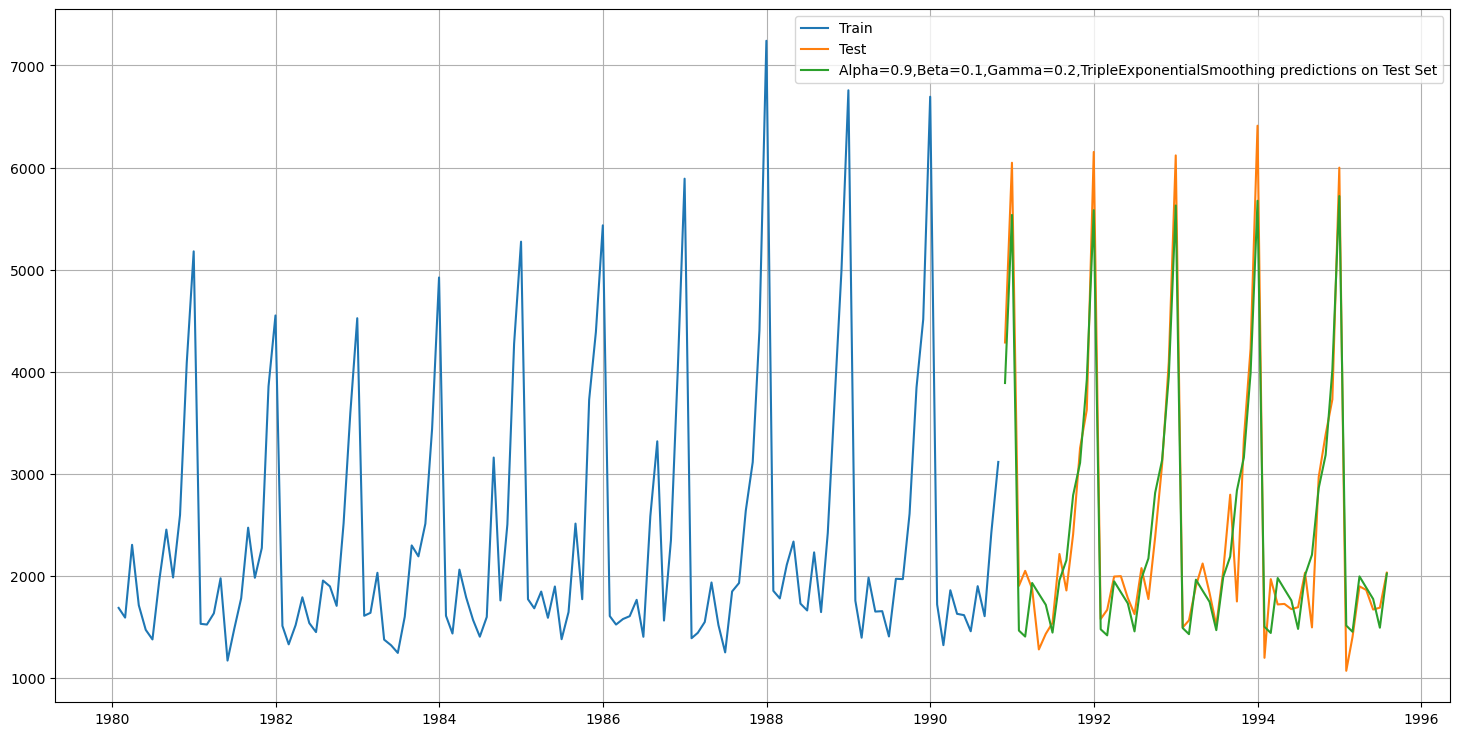

In [69]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.9,0.1, 0.2], label='Alpha=0.9,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [70]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.9,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

,Test RMSE
RegressionOnTime,1392.438305
2pointTrailingMovingAverage,811.178937
4pointTrailingMovingAverage,1184.213295
6pointTrailingMovingAverage,1337.200524
9pointTrailingMovingAverage,1422.653281
"Alpha=0.995,SimpleExponentialSmoothing",1362.428949
"Alpha=0.4,Beta=0.1,DoubleExponentialSmoothing",1369.140000
"Alpha=0.0757,Beta=0.0648,Gamma=0.3765,TripleExponentialSmoothing",381.656471
"Alpha=0.9,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing",342.320000


### Check for stationarity of the whole Time Series data.

In [71]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

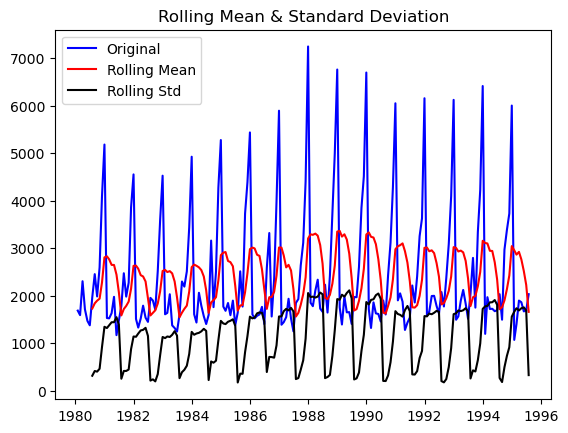

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [72]:
test_stationarity(df_1['Sparkling'])

We see that at 5% significant level the Time Series is non-stationary.Let us take a difference of order 1 and check whether the Time Series is stationary or not.

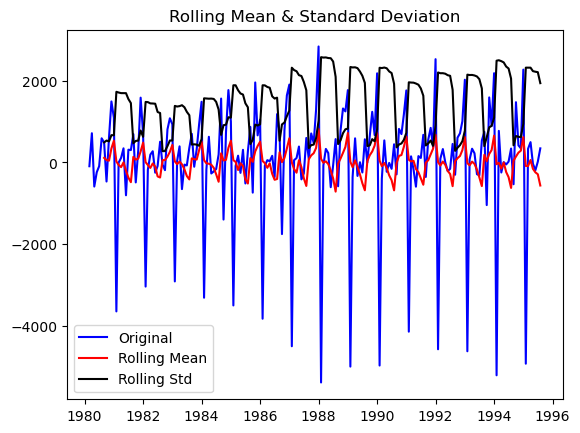

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [73]:
test_stationarity(df_1['Sparkling'].diff().dropna())

We see that at  𝛼  = 0.05 the Time Series is indeed stationary.

Model Building - Stationary Data
- Generate ACF & PACF Plot and find the AR, MA values. - Build different ARIMA models - Auto ARIMA - Manual ARIMA - Build different SARIMA models - Auto SARIMA - Manual SARIMA - Check the performance of the models built

Plot the Autocorrelation function plots on the whole data.

In [74]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

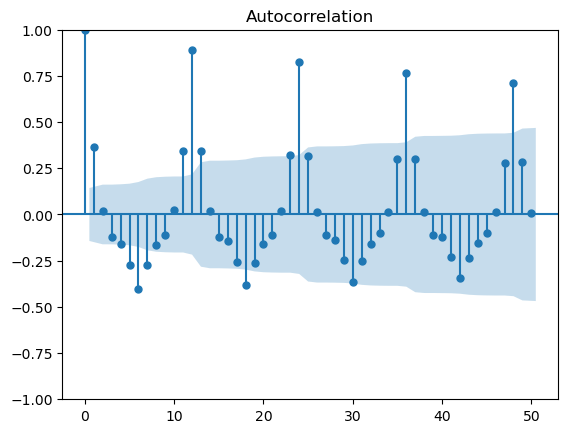

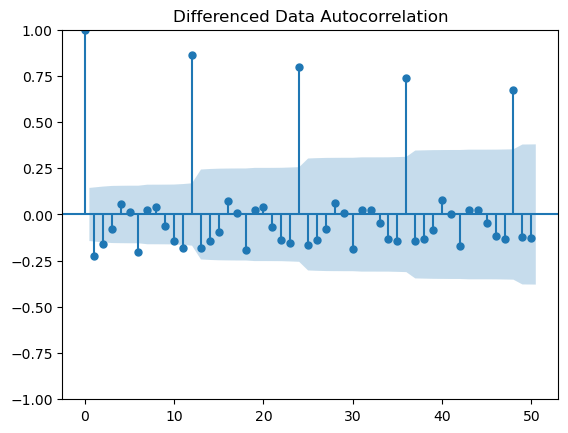

In [75]:
plot_acf(df_1['Sparkling'],lags=50)
plot_acf(df_1['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

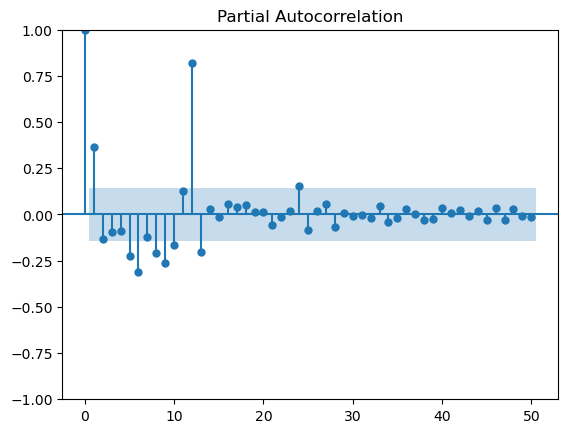

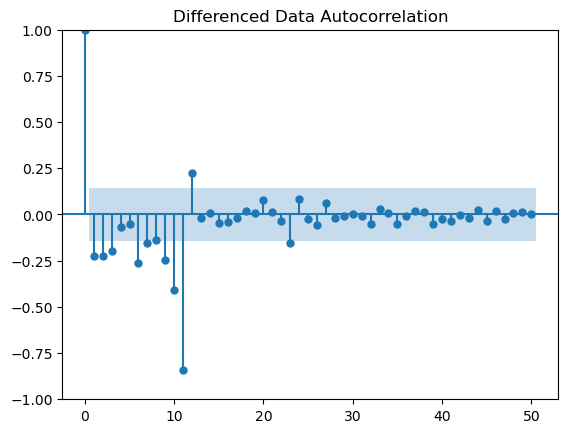

In [76]:
plot_pacf(df_1['Sparkling'],lags=50)
plot_pacf(df_1['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

## Build an Automated version of an <font color='blue'>ARMA model</font> for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [77]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 0 as we necessary for an ARMA model 

import itertools
p = q = range(0, 3)
d= range(1)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 0, 1)
Model: (0, 0, 2)
Model: (1, 0, 0)
Model: (1, 0, 1)
Model: (1, 0, 2)
Model: (2, 0, 0)
Model: (2, 0, 1)
Model: (2, 0, 2)


In [78]:
# Creating an empty Dataframe with column names only
ARMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARMA_AIC

,param,AIC


In [79]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARMA_model.aic))
    ARMA_AIC = pd.concat([ARMA_AIC, pd.DataFrame({'param': [param], 'AIC': [ARMA_model.aic]})], ignore_index=True)

ARIMA(0, 0, 0) - AIC:2228.4836604091106
ARIMA(0, 0, 1) - AIC:2204.8697988532067
ARIMA(0, 0, 2) - AIC:2206.1112074350963
ARIMA(1, 0, 0) - AIC:2207.5021008952044
ARIMA(1, 0, 1) - AIC:2206.142158237979
ARIMA(1, 0, 2) - AIC:2207.1630481805896


C:\Users\u411715\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\u411715\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 0, 0) - AIC:2204.880721920144
ARIMA(2, 0, 1) - AIC:2197.084441912505
ARIMA(2, 0, 2) - AIC:2208.1208886930826


In [80]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
7,"(2, 0, 1)",2197.084442
1,"(0, 0, 1)",2204.869799
6,"(2, 0, 0)",2204.880722
2,"(0, 0, 2)",2206.111207
4,"(1, 0, 1)",2206.142158
5,"(1, 0, 2)",2207.163048
3,"(1, 0, 0)",2207.502101
8,"(2, 0, 2)",2208.120889
0,"(0, 0, 0)",2228.483660


In [81]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,0,1))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\u411715\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\u411715\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\u411715\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  130
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -1093.542
Date:                Sun, 15 Sep 2024   AIC                           2197.084
Time:                        18:56:59   BIC                           2211.422
Sample:                    01-31-1980   HQIC                          2202.910
                         - 10-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2379.9376    112.866     21.086      0.000    2158.724    2601.151
ar.L1          1.2114      0.135      8.991      0.000       0.947       1.475
ar.L2         -0.4998      0.124     -4.046      0.0

Predict on the Test Set using this model and evaluate the model.

In [82]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [83]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA,squared=False)
print(rmse)

1338.139912740534


In [84]:
resultsDf = pd.concat([resultsDf, pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(2,0,1)'])])

resultsDf

,Test RMSE
RegressionOnTime,1392.438305
2pointTrailingMovingAverage,811.178937
4pointTrailingMovingAverage,1184.213295
6pointTrailingMovingAverage,1337.200524
9pointTrailingMovingAverage,1422.653281
"Alpha=0.995,SimpleExponentialSmoothing",1362.428949
"Alpha=0.4,Beta=0.1,DoubleExponentialSmoothing",1369.140000
"Alpha=0.0757,Beta=0.0648,Gamma=0.3765,TripleExponentialSmoothing",381.656471
"Alpha=0.9,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing",342.320000
"ARIMA(2,0,1)",1338.139913


Predict on the Test Set using this model and evaluate the model.

In [85]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test['Sparkling']))

In [86]:
# Ensure predicted_auto_ARIMA contains an array of predicted values
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test['Sparkling']))

# Access the predicted values correctly (assuming the forecast output is an array)
rmse_arima_auto_model = metrics.mean_squared_error(test['Sparkling'], predicted_auto_ARIMA, squared=False)

print("For Auto-ARIMA Model forecast accuracy_score on the Test Data, RMSE is %3.3f" % (rmse_arima_auto_model))

For Auto-ARIMA Model forecast accuracy_score on the Test Data, RMSE is 1338.140


Setting the seasonality as 12 to estimate parametrs using auto SARIMA model.

In [87]:
SARIMA_train = train.copy()
SARIMA_test = test.copy()

In [88]:
import itertools
p = q = range(0,3)
d= range(1,2)
D = range(1,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)


In [89]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [90]:
import statsmodels.api as sm


for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        
       
        SARIMA_AIC = pd.concat([SARIMA_AIC, pd.DataFrame({'param':[param],'seasonal':[param_seasonal] ,'AIC': [results_SARIMA.aic]})], ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:1792.6702968682823
SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:1597.5918854645836
SARIMA(0, 1, 0)x(0, 1, 2, 12)7 - AIC:1423.204488988325
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:1616.9672491166768
SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:1599.112873615649
SARIMA(0, 1, 0)x(1, 1, 2, 12)7 - AIC:1424.9511274926213
SARIMA(0, 1, 0)x(2, 1, 0, 12)7 - AIC:1436.697580602875
SARIMA(0, 1, 0)x(2, 1, 1, 12)7 - AIC:1438.6399261416725
SARIMA(0, 1, 0)x(2, 1, 2, 12)7 - AIC:1426.0219853252522
SARIMA(0, 1, 1)x(0, 1, 0, 12)7 - AIC:1730.995357608444
SARIMA(0, 1, 1)x(0, 1, 1, 12)7 - AIC:1540.246434947874
SARIMA(0, 1, 1)x(0, 1, 2, 12)7 - AIC:1369.1181107411062
SARIMA(0, 1, 1)x(1, 1, 0, 12)7 - AIC:1573.278968942413
SARIMA(0, 1, 1)x(1, 1, 1, 12)7 - AIC:1540.9211421843318
SARIMA(0, 1, 1)x(1, 1, 2, 12)7 - AIC:1370.9683211868241
SARIMA(0, 1, 1)x(2, 1, 0, 12)7 - AIC:1396.8816271541532
SARIMA(0, 1, 1)x(2, 1, 1, 12)7 - AIC:1398.6418686240927
SARIMA(0, 1, 1)x(2, 1, 2, 12)7 - AIC:1372.001312525335

In [91]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
47,"(1, 1, 2)","(0, 1, 2, 12)",1351.700368
20,"(0, 1, 2)","(0, 1, 2, 12)",1352.195894
50,"(1, 1, 2)","(1, 1, 2, 12)",1353.484193
74,"(2, 1, 2)","(0, 1, 2, 12)",1353.646137
53,"(1, 1, 2)","(2, 1, 2, 12)",1353.678153


In [92]:
#(1, 1, 2)*(0, 1, 2, 12) AIC=1351.700368
auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  130
Model:             SARIMAX(1, 1, 2)x(0, 1, 2, 12)   Log Likelihood                -669.850
Date:                            Sun, 15 Sep 2024   AIC                           1351.700
Time:                                    18:59:47   BIC                           1366.699
Sample:                                         0   HQIC                          1357.749
                                            - 130                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5355      0.225     -2.380      0.017      -0.977      -0.094
ma.L1         -0.2232      0.259   

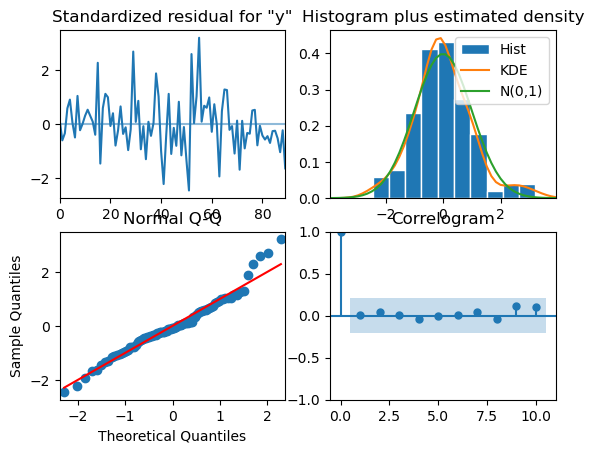

In [93]:
results_auto_SARIMA.plot_diagnostics()
plt.show()

Predict on the Test Set using this model and evaluate the model.

In [94]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test['Sparkling']))

In [95]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,4492.385528,408.329297,3692.074812,5292.696245
1,6860.785070,421.124689,6035.395848,7686.174293
2,1759.056955,423.711960,928.596772,2589.517137
3,1503.078220,424.992368,670.108486,2336.047954
4,1962.858315,425.070294,1129.735847,2795.980784


In [96]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA.predicted_mean,squared=False)
print(rmse)

440.18688930673255


In [97]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(1, 1, 2)*(0, 1, 2, 12)'])

resultsDf

,Test RMSE
"SARIMA(1, 1, 2)*(0, 1, 2, 12)",440.186889


In [98]:
# Extract the predicted and true values of our time series
sparkling_forecasted = predicted_auto_SARIMA.predicted_mean
SARIMA_test['sparkling_forecasted'] = predicted_auto_SARIMA.predicted_mean
SARIMA_test.head()

,Sparkling,sparkling_forecasted
Time_Stamp,,
1990-11-30,4286,4492.385528
1990-12-31,6047,6860.785070
1991-01-31,1902,1759.056955
1991-02-28,2049,1503.078220
1991-03-31,1874,1962.858315


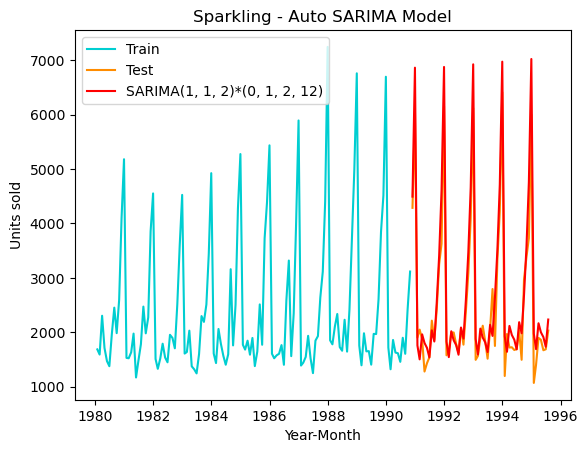

In [99]:
plt.plot(SARIMA_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(SARIMA_test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(SARIMA_test['sparkling_forecasted'], color='red', label='SARIMA(1, 1, 2)*(0, 1, 2, 12)')
plt.xlabel('Year-Month')
plt.ylabel('Units sold')
plt.title('Sparkling - Auto SARIMA Model')
plt.legend(loc='best');

Actionable Insights & Recommendations
- Conclude with the key takeaways (actionable insights and recommendations) for the business

Based on the results, Triple exponential smoorthing has lower RMSE of 342.320000  Alpha=0.9,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing	

In [100]:
Full_model_TES = ExponentialSmoothing(test['Sparkling'],trend='additive',seasonal='multiplicative')
Full_model_TES_fit = Full_model_TES.fit(smoothing_level=0.9,smoothing_trend=0.1,smoothing_seasonal=0.2,optimized=True,use_brute=True)
TES_forecast = Full_model_TES_fit.forecast(steps=12)

C:\Users\u411715\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [101]:
rmse_tes_full = metrics.mean_squared_error(test['Sparkling'],Full_model_TES_fit.fittedvalues,squared=False)
print("For Triple Exponential Smoothing Model forecast on the Entire Data, RMSE is %3.3f" %(rmse_tes_full))

For Triple Exponential Smoothing Model forecast on the Entire Data, RMSE is 465.106


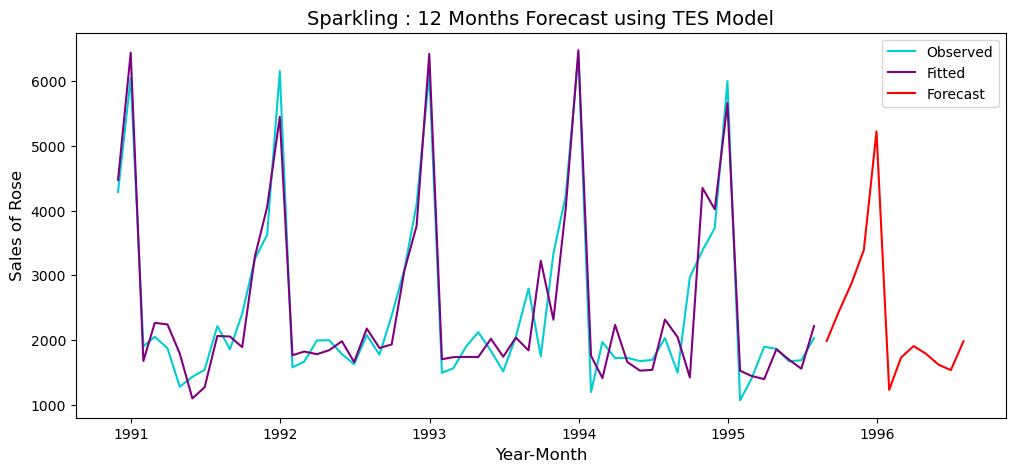

In [102]:
plt.figure(figsize=(12,5))

plt.plot(test['Sparkling'], label='Observed', color = 'darkturquoise')
plt.plot(Full_model_TES_fit.fittedvalues, label='Fitted', color = 'purple')
plt.plot(TES_forecast, label='Forecast', color = 'red')

plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales of Rose',fontsize=12)
plt.title('Sparkling : 12 Months Forecast using TES Model', fontsize=14)

plt.legend(loc='best')
plt.show()

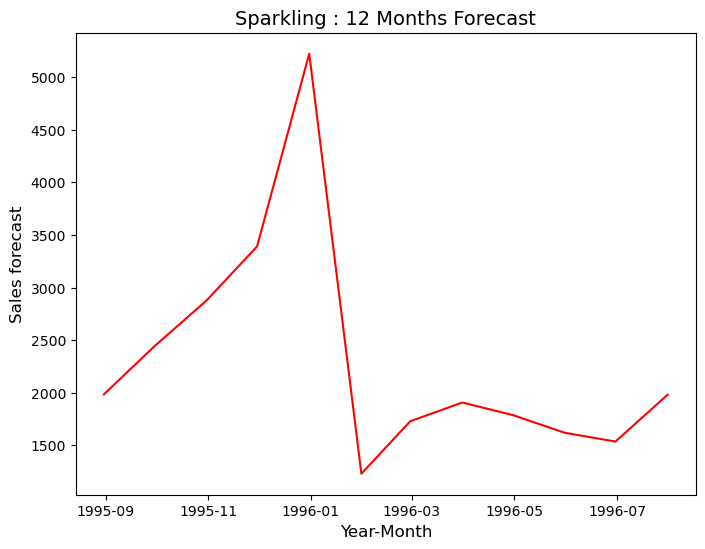

In [103]:
plt.figure(figsize=(8,6))
plt.plot(TES_forecast, label='Forecast', color = 'red')
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales forecast',fontsize=12)
plt.title('Sparkling : 12 Months Forecast', fontsize=14);

In [104]:
TES_forecast.describe()


count      12.000000
mean     2308.663554
std      1096.319790
min      1229.894929
25%      1700.977209
50%      1943.818134
75%      2550.539170
max      5222.324482
dtype: float64

The maximum sales forecast is expected to be 5222 units in the starting month of 1996 and the sales will tend to decrease to 1229.89 between frist month and third month of 1996.